# Pengenalan XGBoost

Selama bertahun-tahun, peneliti machine learning telah menemukan berbagai cara untuk membangun pohon keputusan dan ansambel pohon keputusan. Saat ini, cara yang paling umum digunakan untuk implementasi ansambel pohon keputusan adalah algoritma yang disebut **XGBoost**. Algoritma ini berjalan dengan cepat, implementasi open source-nya mudah digunakan, dan telah berhasil digunakan untuk memenangkan banyak kompetisi machine learning serta dalam berbagai aplikasi komersial.

## Cara Kerja XGBoost

Ada modifikasi pada algoritma pohon keputusan yang telah kita bahas di video sebelumnya yang dapat membuatnya bekerja lebih baik. Berikut adalah algoritma yang telah kita catat sebelumnya:

1. **Diberikan himpunan pelatihan dengan ukuran M,** ulangi sebanyak B kali:
   - Gunakan *sampling dengan penggantian* untuk membuat himpunan pelatihan baru dengan ukuran M.
   - Latih pohon keputusan pada himpunan data baru tersebut.

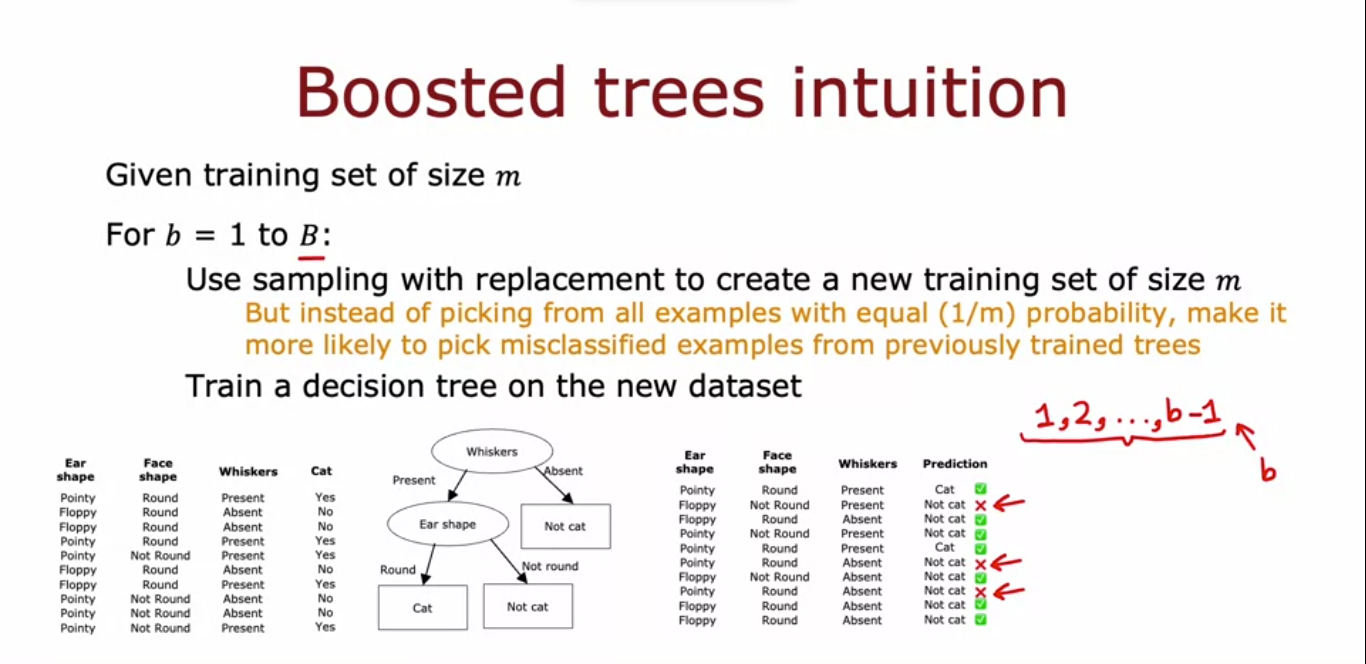

Pada kali pertama melalui loop ini, kita dapat membuat himpunan pelatihan seperti itu dan melatih pohon keputusan seperti ini. Namun, inilah saatnya kita akan mengubah algoritma, yaitu pada setiap kali melalui loop ini, kecuali yang pertama (yaitu kali kedua, ketiga, dan seterusnya), saat melakukan sampling, kita akan membuatnya lebih mungkin untuk memilih contoh yang salah klasifikasi, yang sebelumnya dilatih dengan pohon yang tidak berfungsi dengan baik.

## Praktik Terencana

Dalam pelatihan dan pendidikan, ada sebuah ide yang disebut *praktik terencana*. Misalnya, jika Anda sedang belajar memainkan piano dan mencoba menguasai sebuah lagu, daripada berlatih seluruh lagu yang mungkin berlangsung lima menit berulang kali, yang memakan waktu, Anda dapat memainkan lagu tersebut dan kemudian fokus pada bagian yang belum Anda mainkan dengan baik. Latih bagian-bagian kecil itu berulang kali. Ternyata, ini adalah cara yang lebih efisien untuk belajar memainkan piano dengan baik.

### Konsep Boosting

Konsep boosting mirip dengan ini. Kita akan melihat pohon keputusan yang telah kita latih sejauh ini dan melihat apa yang belum kita lakukan dengan baik. Saat membangun pohon keputusan berikutnya, kita akan lebih fokus pada contoh yang belum kita lakukan dengan baik. Jadi, daripada melihat semua contoh pelatihan, kita lebih memusatkan perhatian pada subset contoh yang belum kita lakukan dengan baik dan mendapatkan pohon keputusan baru yang mencoba untuk berhasil pada mereka. Ini adalah ide di balik boosting, dan ternyata ini membantu algoritma pembelajaran untuk belajar lebih baik dan lebih cepat.

## Proses Boosting

Secara rinci, kita akan melihat pohon yang baru saja kita bangun dan kembali ke himpunan pelatihan asli. Perhatikan bahwa ini adalah himpunan pelatihan asli, bukan yang dihasilkan melalui *sampling dengan penggantian*. Kita akan melalui semua sepuluh contoh dan melihat apa yang diprediksi oleh pohon keputusan yang telah dipelajari pada semua sepuluh contoh tersebut. Kolom keempat adalah prediksi mereka, dan kita memberi tanda centang pada setiap contoh, tergantung pada apakah klasifikasi pohon tersebut benar atau salah.

### Iterasi Selanjutnya

Saat kita melakukan iterasi kedua melalui loop ini, kita akan menggunakan *sampling dengan penggantian* untuk menghasilkan himpunan pelatihan baru dari sepuluh contoh. Namun, setiap kali kita memilih contoh dari sepuluh ini, kita akan memberi kemungkinan yang lebih tinggi untuk memilih salah satu dari tiga contoh yang masih salah klasifikasi. Ini akan memfokuskan perhatian pohon keputusan kedua melalui proses yang mirip dengan praktik terencana pada contoh yang belum dilakukan dengan baik.

## Detail Matematis

Prosedur boosting ini akan dilakukan sebanyak B kali, di mana pada setiap iterasi, Anda melihat apa yang tidak dilakukan dengan baik oleh ansambel pohon (pohon 1, 2, hingga (B-1)). Ketika Anda membangun pohon ke-B, Anda kemudian akan memiliki probabilitas yang lebih tinggi untuk memilih contoh yang belum dilakukan dengan baik oleh ansambel pohon sebelumnya.

Detail matematis tentang seberapa banyak untuk meningkatkan probabilitas memilih contoh ini dibandingkan yang itu cukup kompleks, tetapi Anda tidak perlu khawatir tentang itu untuk menggunakan implementasi pohon yang di-boosting. Dari berbagai cara untuk mengimplementasikan boosting, yang paling banyak digunakan saat ini adalah **XGBoost**, yang merupakan implementasi open source dari pohon yang di-boosting yang sangat cepat dan efisien.

## Inovasi dalam XGBoost

XGBoost juga memiliki pilihan yang baik untuk kriteria pemisahan default dan kriteria untuk kapan berhenti memisahkan. Salah satu inovasi dalam XGBoost adalah bahwa ia juga memiliki regularisasi bawaan untuk mencegah overfitting. Dalam kompetisi machine learning seperti situs kompetisi terkenal, **Kaggle**, XGBoost sering menjadi algoritma yang sangat kompetitif. Faktanya, XGBoost dan algoritma deep learning tampaknya adalah dua jenis algoritma yang memenangkan banyak kompetisi ini.

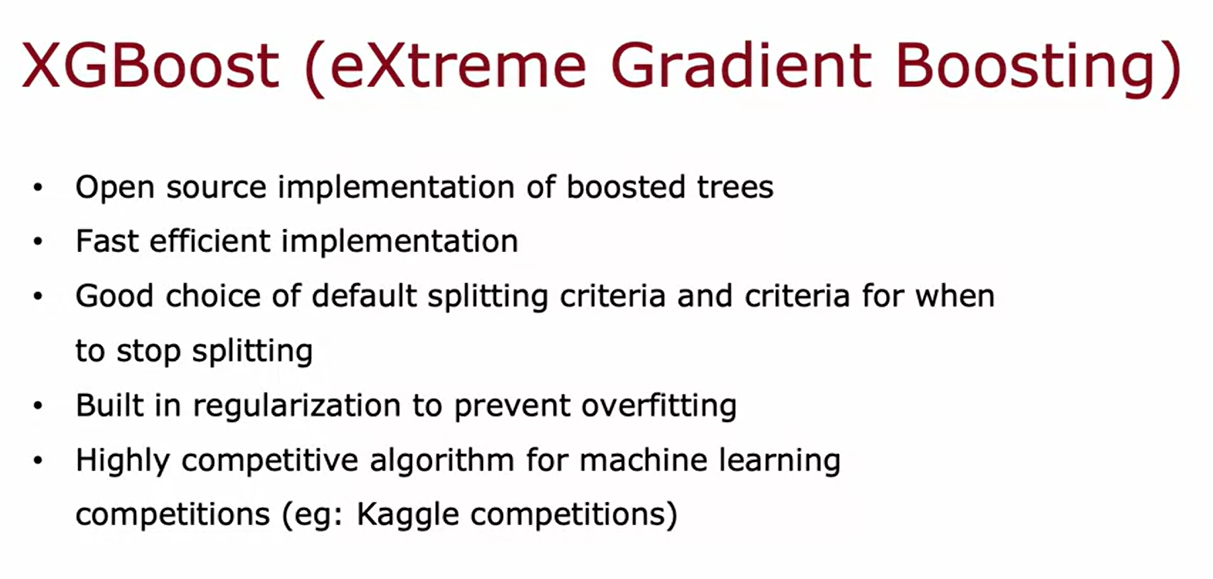

## Catatan Teknis

Satu catatan teknis, alih-alih melakukan *sampling dengan penggantian*, XGBoost sebenarnya memberikan bobot yang berbeda pada berbagai contoh pelatihan. Jadi, ia tidak perlu menghasilkan banyak himpunan pelatihan yang dipilih secara acak, dan ini membuatnya sedikit lebih efisien dibandingkan dengan prosedur *sampling dengan penggantian*. Namun, intuisi yang Anda lihat pada slide sebelumnya masih benar dalam hal bagaimana XGBoost memilih contoh untuk difokuskan.

## Menggunakan XGBoost

Detail XGBoost cukup kompleks untuk diimplementasikan, itulah sebabnya banyak praktisi akan menggunakan pustaka open source yang mengimplementasikan XGBoost. Berikut adalah langkah-langkah yang perlu Anda lakukan untuk menggunakan XGBoost:

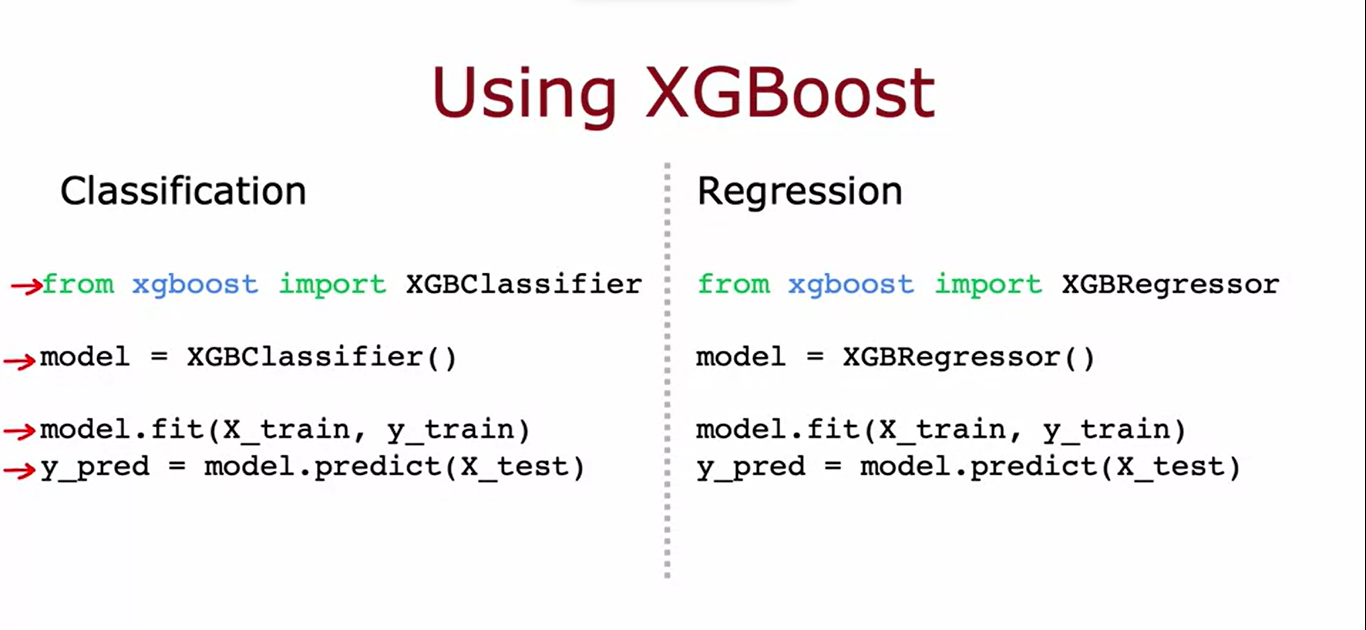

```python
import xgboost as xgb

# Inisialisasi model sebagai classifier XGBoost
model = xgb.XGBClassifier()

# Lakukan pelatihan pada model
model.fit(X_train, y_train)

# Melakukan prediksi menggunakan algoritma pohon yang di-boosting
predictions = model.predict(X_test)

```

Jika Anda ingin menggunakan XGBoost untuk regresi daripada klasifikasi, maka baris ini hanya menjadi XGBRegressor, dan sisa kode akan berfungsi dengan cara yang sama.